In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 불러오기
data = pd.read_csv('machine.data.csv', header=None)


In [32]:
# 컬럼 이름 지정
data.columns = ["vendor", "model", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]

# 필요한 특징 선택 (수치형 데이터만 선택)
features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
target = "PRP"

In [33]:
# 특징과 타겟 데이터 분리
X = data[features]
y = data[target]

# 데이터 타입 확인 및 변환
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# NaN 값 확인 및 제거
X = X.dropna()
y = y.dropna()

In [46]:
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 다항 회귀 모델 학습 (차수는 2로 설정)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

In [47]:
# 교차 검증
cv_scores = cross_val_score(model_poly, X_train_poly, y_train, cv=5, scoring='r2')
print("Cross-validation R^2 scores:", cv_scores)
print("Mean cross-validation R^2 score:", np.mean(cv_scores))

# 학습 데이터에 대한 예측
y_train_pred_poly = model_poly.predict(X_train_poly)

# 테스트 데이터에 대한 예측
y_test_pred_poly = model_poly.predict(X_test_poly)

Cross-validation R^2 scores: [-5.90374508e+02 -3.32585427e+00 -6.00298757e+02 -3.57160849e+00
 -6.18917469e+03]
Mean cross-validation R^2 score: -1477.3490835932162


In [48]:
# 성능 평가
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mae_train_poly = mean_absolute_error(y_train, y_train_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)

mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
mae_test_poly = mean_absolute_error(y_test, y_test_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

print("Training set performance (Polynomial Regression):")
print(f"Mean Squared Error: {mse_train_poly}")
print(f"Mean Absolute Error: {mae_train_poly}")
print(f"R^2: {r2_train_poly}")

print("Test set performance (Polynomial Regression):")
print(f"Mean Squared Error: {mse_test_poly}")
print(f"Mean Absolute Error: {mae_test_poly}")
print(f"R^2: {r2_test_poly}")

Training set performance (Polynomial Regression):
Mean Squared Error: 5985.4783460422905
Mean Absolute Error: 54.21388473053892
R^2: 0.6886528335523705
Test set performance (Polynomial Regression):
Mean Squared Error: 1153895.6360677083
Mean Absolute Error: 388.61160714285717
R^2: -21.66680346769839


In [49]:
# 다항 회귀 모델링
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# 훈련 데이터와 테스트 데이터 분리
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 다항 회귀 모델 학습
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# 학습 데이터에 대한 예측
y_train_pred = poly_model.predict(X_train_poly)

# 테스트 데이터에 대한 예측
y_test_pred = poly_model.predict(X_test_poly)


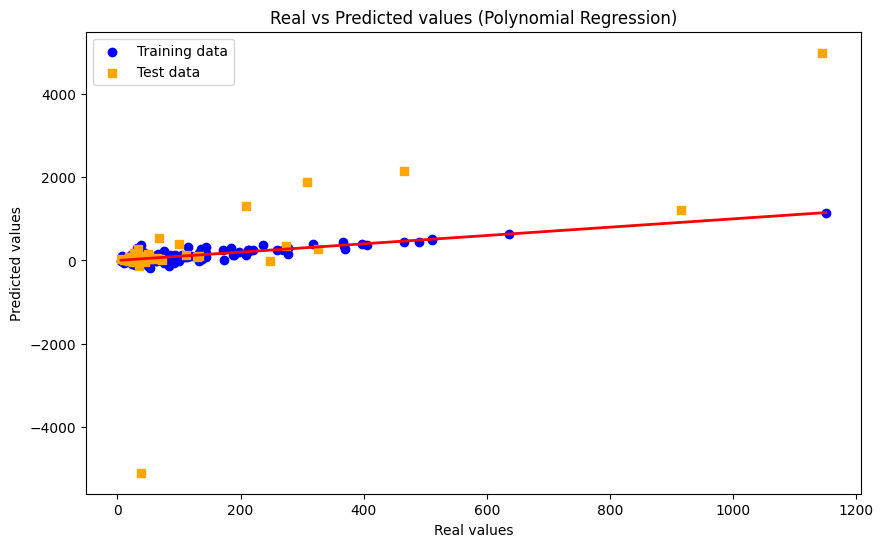

In [50]:
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_poly, c='blue', marker='o', label='Training data')
plt.scatter(y_test, y_test_pred_poly, c='orange', marker='s', label='Test data')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.title('Real vs Predicted values (Polynomial Regression)')
plt.show()

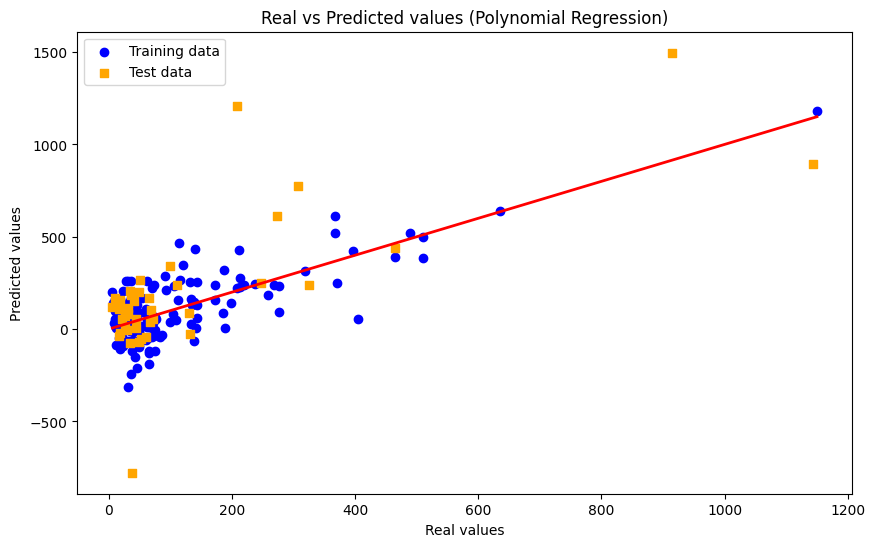

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Training data')
plt.scatter(y_test, y_test_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.title('Real vs Predicted values (Polynomial Regression)')
plt.show()
